# Project - Credit Modeling (Lending Club)

Credit modeling focuses on modeling a borrower's [credit risk](https://en.wikipedia.org/wiki/Credit_risk). Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. 

We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/). Lending Club is a marketplace for personal loans that pairs borrowers who are seeking a loan with investors looking to lend money and make a return.

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percentage in addition to the requested loan amount that the borrower has to pay back. Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% to 30.99% and each borrower is given a [grade](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees) according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the [origination fee](https://help.lendingclub.com/hc/en-us/articles/214463677-Rates-and-fees-for-personal-loans) that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers [default](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-) on the loan.

__Project's Objective:__
- __Build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not.__

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. __In this project, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time.__ To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

### Introduction to the Data

I will use the dataset and data dictionary (`LoanStats.html`) provided by Dataquest. The latter downloaded it from the Lending Club website.

The dataset contains approved loans data from 2007 to 2011.

Before we can start doing machine learning, we need to define what features we want to use and which column represents the target column we want to predict. Let's start by reading and exploring the dataset.

In [1]:
import pandas as pd

loans = pd.read_csv("loans_2007.csv", low_memory=False)

loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [2]:
loans.isnull().sum().sort_values()

id                               0
addr_state                       3
dti                              3
application_type                 3
policy_code                      3
last_pymnt_amnt                  3
collection_recovery_fee          3
zip_code                         3
revol_bal                        3
total_rec_late_fee               3
initial_list_status              3
out_prncp                        3
out_prncp_inv                    3
total_pymnt                      3
total_pymnt_inv                  3
recoveries                       3
total_rec_prncp                  3
purpose                          3
loan_status                      3
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
home_ownership      

In [3]:
nulls_count = loans.isnull().sum().sort_values()

nulls_count_df = pd.DataFrame(nulls_count, columns=["null_count"])

nulls_count_df['null_count_percentage'] = ( nulls_count_df['null_count'] / loans.shape[0] ) * 100

print( nulls_count_df )


                            null_count  null_count_percentage
id                                   0               0.000000
addr_state                           3               0.007053
dti                                  3               0.007053
application_type                     3               0.007053
policy_code                          3               0.007053
last_pymnt_amnt                      3               0.007053
collection_recovery_fee              3               0.007053
zip_code                             3               0.007053
revol_bal                            3               0.007053
total_rec_late_fee                   3               0.007053
initial_list_status                  3               0.007053
out_prncp                            3               0.007053
out_prncp_inv                        3               0.007053
total_pymnt                          3               0.007053
total_pymnt_inv                      3               0.007053
recoveri

In [4]:
dup_bool = loans.duplicated()

print( sum(dup_bool) )


0


In [5]:
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Now,
Let's analyze each feature (column) and determine if it:

- discloses/leaks information from the future (after the loan has already been funded)


- requires more data or a lot of processing to turn it into a useful feature


- contains redundant information


- needs to be cleaned up and formatted

Keep in mind that we need to select one of the features as the __target column__.

In [6]:
i = 0
for col in loans.columns:
    
    unique_values = loans[col].unique()
    unique_cnt = len(unique_values)
    
    print( i, ">>>", col, "(", unique_cnt, ",", loans[col].dtype, ")" )
    
    i += 1
    
    if unique_cnt < 20:
        print( "\t", unique_values, "\n\n" )
        
    else:
        j = 1
        print( "\t Some values are:" )
        string = "\t"
        for val in unique_values:
            string += "'{}', ".format(val)
            j += 1
            if j == 11:
                print( string, "\n\n" )
                break



0 >>> id ( 42538 , object )
	 Some values are:
	'1077501', '1077430', '1077175', '1076863', '1075358', '1075269', '1069639', '1072053', '1071795', '1071570',  


1 >>> member_id ( 42536 , float64 )
	 Some values are:
	'1296599.0', '1314167.0', '1313524.0', '1277178.0', '1311748.0', '1311441.0', '1304742.0', '1288686.0', '1306957.0', '1306721.0',  


2 >>> loan_amnt ( 899 , float64 )
	 Some values are:
	'5000.0', '2500.0', '2400.0', '10000.0', '3000.0', '7000.0', '5600.0', '5375.0', '6500.0', '12000.0',  


3 >>> funded_amnt ( 1052 , float64 )
	 Some values are:
	'5000.0', '2500.0', '2400.0', '10000.0', '3000.0', '7000.0', '5600.0', '5375.0', '6500.0', '12000.0',  


4 >>> funded_amnt_inv ( 9247 , float64 )
	 Some values are:
	'4975.0', '2500.0', '2400.0', '10000.0', '3000.0', '5000.0', '7000.0', '5600.0', '5350.0', '6500.0',  


5 >>> term ( 3 , object )
	 [' 36 months' ' 60 months' nan] 


6 >>> int_rate ( 395 , object )
	 Some values are:
	' 10.65%', ' 15.27%', ' 15.96%', ' 13.49%', 

### Features (Columns) Removal

I will remove the following features (columns) because they don't affect a borrower's ability to pay back a loan:

- `id`


- `member_id`

I will remove the following features because they contain only __1__ unique value (low variance feature). This means that the column isn't informative and isn't going to help the model to make better predictions.

- `initial_list_status`


- `collections_12_mths_ex_med`


- `policy_code`


- `application_type`


- `chargeoff_within_12_mths`

I will remove the following features because they require more data or a lot of processing to turn them into useful features:

- `emp_title`


- `title`

#### > `emp_title`:
As we can see below, this column contains a very large number of unique values (30,658 which represent the 72% of the column values) and has data quality issues since some of the values are repeated with slight modifications (e.g. `USAF`, `US Air Force`, `United States Air Force`; `JP Morgan Chase`, `JPMorgan Chase`; `US Army`, `U.S. Army`).

In [7]:
loans['emp_title'].describe()

count       39909
unique      30658
top       US Army
freq          139
Name: emp_title, dtype: object

In [8]:
loans.shape

(42538, 52)

In [9]:
loans['emp_title'].value_counts(dropna=False)

NaN                                 2629
US Army                              139
Bank of America                      115
IBM                                   72
Kaiser Permanente                     61
                                    ... 
Regional Elite Airlines Services       1
Mass General Medical Group             1
Kontera                                1
Southeast Georgia Health ystem         1
Homemaker                              1
Name: emp_title, Length: 30659, dtype: int64

In [10]:
loans['emp_title'].value_counts(dropna=False, normalize=True) * 100

NaN                                 6.180356
US Army                             0.326767
Bank of America                     0.270347
IBM                                 0.169260
Kaiser Permanente                   0.143401
                                      ...   
Regional Elite Airlines Services    0.002351
Mass General Medical Group          0.002351
Kontera                             0.002351
Southeast Georgia Health ystem      0.002351
Homemaker                           0.002351
Name: emp_title, Length: 30659, dtype: float64

In [11]:
loans['emp_title'].value_counts(dropna=False).head(25)

NaN                        2629
US Army                     139
Bank of America             115
IBM                          72
Kaiser Permanente            61
AT&T                         61
UPS                          58
Wells Fargo                  57
USAF                         56
US Air Force                 55
Self Employed                49
United States Air Force      48
Walmart                      47
Lockheed Martin              46
State of California          45
Verizon Wireless             43
U.S. Army                    42
Walgreens                    41
USPS                         41
US ARMY                      40
Self                         39
Best Buy                     38
JPMorgan Chase               38
Target                       38
JP Morgan Chase              38
Name: emp_title, dtype: int64

#### > `title`:
As we can see below, this column contains a large number of unique values (21,264 which represent the 50% of the column values) and has data quality issues since some of the values are repeated with slight modifications (e.g. `Debt Consolidation`, `Debt Consolidation Loan`, `debt consolidation`, `debt_consolidation`).

Also, the `title` and `purpose` columns contain very similar information. The `purpose` column only contains 15 unique values. Therefore, I will remove the `title` column and keep the `purpose` column.

In [12]:
loans['title'].describe()

count                  42522
unique                 21264
top       Debt Consolidation
freq                    2259
Name: title, dtype: object

In [13]:
loans['title'].isnull().sum()

16

In [14]:
loans['title'].value_counts(dropna=False)

Debt Consolidation                  2259
Debt Consolidation Loan             1760
Personal Loan                        708
Consolidation                        547
debt consolidation                   532
                                    ... 
CitiCard PayOff                        1
Taxes Loan                             1
Blazing in 5 years                     1
I was scammed and now recovering       1
Aroundthehouse                         1
Name: title, Length: 21265, dtype: int64

In [15]:
loans['title'].value_counts(dropna=False, normalize=True) * 100

Debt Consolidation                  5.310546
Debt Consolidation Loan             4.137477
Personal Loan                       1.664394
Consolidation                       1.285909
debt consolidation                  1.250646
                                      ...   
CitiCard PayOff                     0.002351
Taxes Loan                          0.002351
Blazing in 5 years                  0.002351
I was scammed and now recovering    0.002351
Aroundthehouse                      0.002351
Name: title, Length: 21265, dtype: float64

In [16]:
loans['title'].value_counts(dropna=False).head(50)

Debt Consolidation                2259
Debt Consolidation Loan           1760
Personal Loan                      708
Consolidation                      547
debt consolidation                 532
Home Improvement                   373
Credit Card Consolidation          370
Debt consolidation                 347
Small Business Loan                333
Personal                           330
Credit Card Loan                   323
personal loan                      266
Consolidation Loan                 264
Home Improvement Loan              255
personal                           247
Loan                               218
consolidation                      217
Wedding Loan                       217
Car Loan                           206
Other Loan                         192
Credit Card Payoff                 164
Wedding                            160
Credit Card Refinance              147
Major Purchase Loan                146
Consolidate                        141
Medical                  

In [17]:
loans['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', nan], dtype=object)

I will __remove__ the following features because they __leak information from the future__, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

- `funded_amt`, `funded_amnt_inv`, `issue_d`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, `last_pymnt_amnt`, `earliest_cr_line`, `last_credit_pull_d`

I will remove the following features because they contain redundant information.

- `grade`


- `sub_grade`


- `zip_code`

#### > `grade` and `sub_grade`:
These two columns are based on the borrower's interest rate (`int_rate` column). I prefer to use `int_rate` which contains continuous values than `grade` and `sub_grade` which values are categorical. Continuous values are better suited for machine learning.

In [18]:
loans[['grade', 'sub_grade', 'int_rate']].sample(30).sort_values( by=['grade', 'sub_grade'] )

,grade,sub_grade,int_rate
22013,A,A1,5.42%
14928,A,A3,6.99%
22469,A,A5,6.91%
30871,A,A5,7.88%
10903,A,A5,8.49%
16320,A,A5,7.66%
11980,B,B1,9.99%
26507,B,B1,10.38%
10043,B,B1,9.99%
5229,B,B1,9.91%


In [19]:
tmp_1 = loans[['grade', 'sub_grade', 'int_rate']].copy()

tmp_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   grade      42535 non-null  object
 1   sub_grade  42535 non-null  object
 2   int_rate   42535 non-null  object
dtypes: object(3)
memory usage: 997.1+ KB


In [20]:
tmp_1['int_rate'] = tmp_1['int_rate'].str.rstrip("%").astype("float")


In [21]:
tmp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   grade      42535 non-null  object 
 1   sub_grade  42535 non-null  object 
 2   int_rate   42535 non-null  float64
dtypes: float64(1), object(2)
memory usage: 997.1+ KB


In [22]:
tmp_1['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [23]:
tmp_1['grade'].value_counts(dropna=False).sort_index()

A      10183
B      12389
C       8740
D       6016
E       3394
F       1301
G        512
NaN        3
Name: grade, dtype: int64

In [24]:
import numpy as np

grades = list( tmp_1['grade'].unique() )

grades.remove(np.nan)

grades.sort()


for grade in grades:
    
    grade_bool = tmp_1['grade'] == grade
    
    print( ">> Grade:", grade )
    
    print( " - Sub-grades:", tmp_1[grade_bool]['sub_grade'].unique() )
    
    print( " - Interest Rate info:\n", tmp_1[grade_bool]['int_rate'].describe(), "\n" )


>> Grade: A
 - Sub-grades: ['A4' 'A1' 'A3' 'A5' 'A2']
 - Interest Rate info:
 count    10183.000000
mean         7.342708
std          1.032999
min          5.420000
25%          6.620000
50%          7.490000
75%          7.900000
max          9.630000
Name: int_rate, dtype: float64 

>> Grade: B
 - Sub-grades: ['B2' 'B5' 'B1' 'B3' 'B4']
 - Interest Rate info:
 count    12389.000000
mean        11.014209
std          0.905096
min          6.000000
25%         10.370000
50%         10.990000
75%         11.710000
max         12.690000
Name: int_rate, dtype: float64 

>> Grade: C
 - Sub-grades: ['C4' 'C5' 'C1' 'C3' 'C2']
 - Interest Rate info:
 count    8740.000000
mean       13.499889
std         0.972367
min         6.000000
25%        12.990000
50%        13.490000
75%        13.990000
max        16.110000
Name: int_rate, dtype: float64 

>> Grade: D
 - Sub-grades: ['D1' 'D2' 'D5' 'D3' 'D4']
 - Interest Rate info:
 count    6016.000000
mean       15.577149
std         1.242256
min   

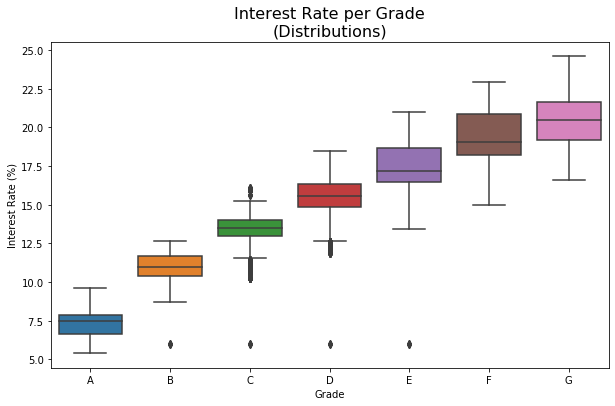

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'grade', y = 'int_rate', data = tmp_1, \
             order=['A', 'B', 'C', 'D', 'E', 'F', 'G'] )


plt.title('Interest Rate per Grade\n(Distributions)', fontsize = 16)

plt.ylabel('Interest Rate (%)')

plt.xlabel('Grade')

plt.show()


#### > `zip_code`:
This column is redundant with the `addr_state` column since only the first 3 digits of the 5-digit zip code are visible which can only be used to identify the state the borrower lives in.

In [26]:
loans['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [27]:
loans['addr_state'].head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

Let's proceed to drop the columns:

In [28]:
loans.drop( columns=["id", "member_id", "initial_list_status", "collections_12_mths_ex_med", \
                     "policy_code", "application_type", "chargeoff_within_12_mths", \
                     "emp_title", "title", "funded_amnt", "funded_amnt_inv", "issue_d", \
                     "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", \
                     "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", \
                     "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", \
                     "earliest_cr_line", "last_credit_pull_d", "grade", "sub_grade", \
                     "zip_code"], inplace=True )


In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   term                  42535 non-null  object 
 2   int_rate              42535 non-null  object 
 3   installment           42535 non-null  float64
 4   emp_length            41423 non-null  object 
 5   home_ownership        42535 non-null  object 
 6   annual_inc            42531 non-null  float64
 7   verification_status   42535 non-null  object 
 8   loan_status           42535 non-null  object 
 9   pymnt_plan            42535 non-null  object 
 10  purpose               42535 non-null  object 
 11  addr_state            42535 non-null  object 
 12  dti                   42535 non-null  float64
 13  delinq_2yrs           42506 non-null  float64
 14  inq_last_6mths        42506 non-null  float64
 15  open_acc           

In [30]:
loans.shape

(42538, 24)

### Missing Values

Let's check the proportions of the missing values:

In [31]:
loans.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    1368
emp_length              1115
tax_liens                108
revol_util                93
delinq_2yrs               32
delinq_amnt               32
acc_now_delinq            32
total_acc                 32
pub_rec                   32
open_acc                  32
inq_last_6mths            32
annual_inc                 7
revol_bal                  3
loan_amnt                  3
term                       3
addr_state                 3
purpose                    3
pymnt_plan                 3
loan_status                3
verification_status        3
home_ownership             3
installment                3
int_rate                   3
dti                        3
dtype: int64

In [32]:
nulls_count = loans.isnull().sum().sort_values(ascending=False)

nulls_count_df = pd.DataFrame(nulls_count, columns=["null_count"])

nulls_count_df['null_count_percentage'] = ( nulls_count_df['null_count'] / loans.shape[0] ) * 100

print( nulls_count_df )


                      null_count  null_count_percentage
pub_rec_bankruptcies        1368               3.215948
emp_length                  1115               2.621186
tax_liens                    108               0.253891
revol_util                    93               0.218628
delinq_2yrs                   32               0.075227
delinq_amnt                   32               0.075227
acc_now_delinq                32               0.075227
total_acc                     32               0.075227
pub_rec                       32               0.075227
open_acc                      32               0.075227
inq_last_6mths                32               0.075227
annual_inc                     7               0.016456
revol_bal                      3               0.007053
loan_amnt                      3               0.007053
term                           3               0.007053
addr_state                     3               0.007053
purpose                        3               0

Above, we can see that the following two columns contain the highest number of missing values (although they both represent a very small percentage of the total number of rows):

- `pub_rec_bankruptcies`


- `emp_length`

#### > `pub_rec_bankruptcies`:

In [33]:
loans['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    39316
1.0     1846
NaN     1368
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [34]:
loans['pub_rec_bankruptcies'].value_counts(dropna=False, normalize=True) * 100

0.0    92.425596
1.0     4.339649
NaN     3.215948
2.0     0.018807
Name: pub_rec_bankruptcies, dtype: float64

We can see that this column has __very little variability__, 92% of values are in the same category. It probably won't have much predictive value. 

Let's drop the `pub_rec_bankruptcies` column.

In [35]:
loans.shape

(42538, 24)

In [36]:
loans.drop( columns=['pub_rec_bankruptcies'], inplace=True )

In [37]:
loans.shape

(42538, 23)

#### > `emp_length`:

Since this column contains only 2.6% of missing values, I will drop its missing values:

In [38]:
loans_2 = loans.dropna( subset=['emp_length'] ).copy()

loans_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41423 entries, 0 to 42535
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            41423 non-null  float64
 1   term                 41423 non-null  object 
 2   int_rate             41423 non-null  object 
 3   installment          41423 non-null  float64
 4   emp_length           41423 non-null  object 
 5   home_ownership       41423 non-null  object 
 6   annual_inc           41419 non-null  float64
 7   verification_status  41423 non-null  object 
 8   loan_status          41423 non-null  object 
 9   pymnt_plan           41423 non-null  object 
 10  purpose              41423 non-null  object 
 11  addr_state           41423 non-null  object 
 12  dti                  41423 non-null  float64
 13  delinq_2yrs          41394 non-null  float64
 14  inq_last_6mths       41394 non-null  float64
 15  open_acc             41394 non-null 

In [39]:
loans_2.isnull().sum().sort_values(ascending=False)

tax_liens              105
revol_util              87
delinq_amnt             29
acc_now_delinq          29
total_acc               29
pub_rec                 29
open_acc                29
inq_last_6mths          29
delinq_2yrs             29
annual_inc               4
dti                      0
revol_bal                0
loan_amnt                0
term                     0
purpose                  0
pymnt_plan               0
loan_status              0
verification_status      0
home_ownership           0
emp_length               0
installment              0
int_rate                 0
addr_state               0
dtype: int64

We can see (above) that the remaining number of missing values is insignificant. Hence, let's proceed to drop them:

In [40]:
loans_2.shape

(41423, 23)

In [41]:
# By default, the axis parameter is set to "0" (which is equivalent to "index") which means:
# drop rows which contain missing values
loans_2.dropna( axis=0, inplace=True )


In [42]:
loans_2.shape

(41261, 23)

In [43]:
loans_2.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
acc_now_delinq         0
delinq_amnt            0
tax_liens              0
dtype: int64

### Features (columns) that need to be cleaned up and formatted:

- `term`


- `emp_length`


- `home_ownership`


- `int_rate`


- `revol_util`

#### > `term`:

I can see that this column is being considered as _nominal_ (i.e. variable measured on a nominal scale). I will change it to a _ratio_ scale because I realized that this column is quantitative (instead of qualitative) and we can tell the direction and the size of the difference.

I will convert this column from string to numeric data type. Values are in months and can be either 36 or 60.

In [44]:
loans_2['term'].dtype

dtype('O')

In [45]:
loans_2['term'].value_counts(dropna=False)

 36 months    30541
 60 months    10720
Name: term, dtype: int64

In [46]:
term_dict = {
    " 36 months": 36,
    " 60 months": 60
}

loans_2['term'] = loans_2['term'].map( term_dict )


In [47]:
loans_2['term'].value_counts(dropna=False)

36    30541
60    10720
Name: term, dtype: int64

In [48]:
loans_2['term'].dtype

dtype('int64')

#### > `emp_length`:

I can see that this column is being considered as _nominal_ (i.e. variable measured on a nominal scale). I will change it to a _ratio_ scale because I realized that this column is quantitative (instead of qualitative) and we can tell the direction and the size of the difference.

I will convert this column from string to numeric data type. The column units are _years_.

In [49]:
loans_2['emp_length'].dtype

dtype('O')

In [50]:
loans_2['emp_length'].value_counts()

10+ years    9357
< 1 year     5005
2 years      4727
3 years      4354
4 years      3635
1 year       3568
5 years      3452
6 years      2370
7 years      1869
8 years      1587
9 years      1337
Name: emp_length, dtype: int64

In [51]:
loans_2['emp_length'].value_counts(normalize=True) * 100

10+ years    22.677589
< 1 year     12.130099
2 years      11.456339
3 years      10.552338
4 years       8.809772
1 year        8.647391
5 years       8.366254
6 years       5.743923
7 years       4.529701
8 years       3.846247
9 years       3.240348
Name: emp_length, dtype: float64

In [52]:
emp_length_dict = {
    "10+ years": 10,
    "9 years": 9,
    "8 years": 8,
    "7 years": 7,
    "6 years": 6,
    "5 years": 5,
    "4 years": 4,
    "3 years": 3,
    "2 years": 2,
    "1 year": 1,
    "< 1 year": 0.5
}

loans_2['emp_length'] = loans_2['emp_length'].map( emp_length_dict )


In [53]:
loans_2['emp_length'].value_counts()

10.0    9357
0.5     5005
2.0     4727
3.0     4354
4.0     3635
1.0     3568
5.0     3452
6.0     2370
7.0     1869
8.0     1587
9.0     1337
Name: emp_length, dtype: int64

In [54]:
loans_2['emp_length'].dtype

dtype('float64')

#### > `home_ownership`:

According to the columns dictionary, the allowed values are: `RENT`, `MORTGAGE`, `OWN`, `OTHER`.

I will replace the two `NONE` values with `OTHER`.

In [55]:
loans_2['home_ownership'].value_counts()

RENT        19668
MORTGAGE    18444
OWN          3013
OTHER         134
NONE            2
Name: home_ownership, dtype: int64

In [56]:
none_bool = loans_2['home_ownership'] == "NONE"

none_bool.sum()


2

In [57]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,NONE,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,0.0,9.0,0.0,4767.0,8.7%,22.0,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,NONE,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,3.0,7.0,0.0,3193.0,59.1%,26.0,0.0,0.0,0.0


In [58]:
loans_2[none_bool]['home_ownership'] = "OTHER"

C:\Users\helen\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,NONE,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,0.0,9.0,0.0,4767.0,8.7%,22.0,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,NONE,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,3.0,7.0,0.0,3193.0,59.1%,26.0,0.0,0.0,0.0


In [60]:
loans_2[none_bool].index

Int64Index([39387, 42212], dtype='int64')

In [61]:
loans_2.loc[ loans_2[none_bool].index, 'home_ownership' ] = "OTHER" 

In [62]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,OTHER,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,0.0,9.0,0.0,4767.0,8.7%,22.0,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,OTHER,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,3.0,7.0,0.0,3193.0,59.1%,26.0,0.0,0.0,0.0


In [63]:
loans_2['home_ownership'].value_counts()

RENT        19668
MORTGAGE    18444
OWN          3013
OTHER         136
Name: home_ownership, dtype: int64

#### > `int_rate` and `revol_util`:

For these two columns, I will remove the percentage sign and convert them from string to numeric data type.

In [64]:
loans_2['int_rate'].value_counts()

 10.99%    946
 13.49%    818
 11.49%    812
  7.51%    756
  7.88%    715
          ... 
 21.48%      1
 17.41%      1
 17.44%      1
 16.33%      1
 22.64%      1
Name: int_rate, Length: 394, dtype: int64

In [65]:
loans_2['int_rate'].dtype

dtype('O')

In [66]:
loans_2['revol_util'].value_counts()

0%        1031
0.2%        63
40.7%       63
63%         62
66.6%       61
          ... 
21.72%       1
21.59%       1
39.95%       1
0.01%        1
105.3%       1
Name: revol_util, Length: 1116, dtype: int64

In [67]:
loans_2['revol_util'].dtype

dtype('O')

In [68]:
loans_2['int_rate'] = loans_2['int_rate'].str.rstrip("%").astype("float")

loans_2['revol_util'] = loans_2['revol_util'].str.rstrip("%").astype("float")


In [69]:
loans_2['int_rate'].dtype

dtype('float64')

In [70]:
loans_2['revol_util'].dtype

dtype('float64')

### Target Column

Let's use the `loan_status` column as the target column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower.

In [71]:
loans_2['loan_status'].value_counts()

Fully Paid                                             32258
Charged Off                                             5390
Does not meet the credit policy. Status:Fully Paid      1906
Current                                                  923
Does not meet the credit policy. Status:Charged Off      733
Late (31-120 days)                                        23
In Grace Period                                           18
Late (16-30 days)                                          8
Default                                                    2
Name: loan_status, dtype: int64

In [72]:
loans_2['loan_status'].value_counts(normalize=True) * 100

Fully Paid                                             78.180364
Charged Off                                            13.063183
Does not meet the credit policy. Status:Fully Paid      4.619374
Current                                                 2.236979
Does not meet the credit policy. Status:Charged Off     1.776496
Late (31-120 days)                                      0.055743
In Grace Period                                         0.043625
Late (16-30 days)                                       0.019389
Default                                                 0.004847
Name: loan_status, dtype: float64

There are 9 different possible values for the `loan_status` column:

- You can read [here](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-) about most of the different loan statuses.


- Explanation found in the [internet](https://www.uxax.org/post/data-cleaning-and-preparation-for-machine-learning) with regard to the two values that start with `Does not meet the credit policy`: "While the loan was [paid off / charged off], the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."

__From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be__. Only the `Fully Paid` and `Charged Off` values describe the final outcome of the loan. The other values describe loans that are in progress and where we do not know if the borrower will pay back the loan on time or not. While the `Default` status resembles the `Charged Off` status, according to [Lending Club](https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-), loans that are charged off have essentially no chance of being repaid while default ones have a small chance.

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a __binary classification__ one. 

Let's remove all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status and then transform the `Fully Paid` values to `1` for the positive case and the `Charged Off` values to `0` for the negative case.

Lastly, one thing we need to keep in mind is the __class imbalance__ between the positive and negative cases. While there are 32,257 loans that have been fully paid off, there are only 5,389 that were charged off. 

- There are about __6 times__ as many loans that were paid off on time (positive case, label of `1`) than those that weren't (negative case, label of `0`).

This class imbalance is a common problem in binary classification and during training, the model ends up having a strong bias towards predicting the class with more observations in the training set and will rarely predict the class with less observations. The stronger the imbalance, the more biased the model becomes.

Due to its potential to cause issues, we need to keep the class imbalance in mind as we build machine learning models.

In [73]:
loans_2.shape

(41261, 23)

In [74]:
loan_status_bool = (loans_2['loan_status'] == "Fully Paid") | (loans_2['loan_status'] == "Charged Off")

loans_3 = loans_2[loan_status_bool].copy()


status_replace = { "loan_status": {
                            "Fully Paid": 1,
                            "Charged Off": 0
                    } 
                 }


loans_3 = loans_3.replace( status_replace )


In [75]:
loans_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37648 non-null  float64
 1   term                 37648 non-null  int64  
 2   int_rate             37648 non-null  float64
 3   installment          37648 non-null  float64
 4   emp_length           37648 non-null  float64
 5   home_ownership       37648 non-null  object 
 6   annual_inc           37648 non-null  float64
 7   verification_status  37648 non-null  object 
 8   loan_status          37648 non-null  int64  
 9   pymnt_plan           37648 non-null  object 
 10  purpose              37648 non-null  object 
 11  addr_state           37648 non-null  object 
 12  dti                  37648 non-null  float64
 13  delinq_2yrs          37648 non-null  float64
 14  inq_last_6mths       37648 non-null  float64
 15  open_acc             37648 non-null 

In [76]:
loans_3.shape

(37648, 23)

In [77]:
loans_3['loan_status'].value_counts(dropna=False)

1    32258
0     5390
Name: loan_status, dtype: int64

### Removing More Single Value Columns

By removing all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status we ended up with 37,646 rows (we had originally 42,538).

Therefore, let's look for any additional columns that contain only one unique value (low variance features) and remove them. These columns won't be useful for the model since they don't add any information to each loan application.

In [78]:
low_variance_features = []

for col in loans_3.columns:
    
    if len( loans_3[col].unique() ) == 1:
        
        low_variance_features.append(col)


print( low_variance_features )


['pymnt_plan', 'acc_now_delinq', 'delinq_amnt', 'tax_liens']


In [79]:
loans_3.drop( columns=low_variance_features, inplace=True )


In [80]:
loans_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37648 non-null  float64
 1   term                 37648 non-null  int64  
 2   int_rate             37648 non-null  float64
 3   installment          37648 non-null  float64
 4   emp_length           37648 non-null  float64
 5   home_ownership       37648 non-null  object 
 6   annual_inc           37648 non-null  float64
 7   verification_status  37648 non-null  object 
 8   loan_status          37648 non-null  int64  
 9   purpose              37648 non-null  object 
 10  addr_state           37648 non-null  object 
 11  dti                  37648 non-null  float64
 12  delinq_2yrs          37648 non-null  float64
 13  inq_last_6mths       37648 non-null  float64
 14  open_acc             37648 non-null  float64
 15  pub_rec              37648 non-null 

In [81]:
loans_3.shape

(37648, 19)

### Dummy Variables

Let's use dummy variables for columns containing categorical values. Whenever we have more than 2 categories, we need to create more columns to represent the categories.

In [82]:
object_columns_df = loans_3.select_dtypes( include=['object'] )

object_columns_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_ownership       37648 non-null  object
 1   verification_status  37648 non-null  object
 2   purpose              37648 non-null  object
 3   addr_state           37648 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [84]:
object_columns_df.describe()

,home_ownership,verification_status,purpose,addr_state
count,37648,37648,37648,37648
unique,4,3,14,50
top,RENT,Not Verified,debt_consolidation,CA
freq,18105,16248,17747,6778


### > IMPORTANT NOTE:

Since the `addr_state` column contains a __higher__ number of unique values (compared to the other three columns --see above table), I would like to approach the problem in two different ways (by using two different dataframes).

1. Option 1: Consider the columns that do not have a high number of unique values: `home_ownership`, `verification_status`, and `purpose`


2. Option 2: Consider the columns from Option 1 plus `addr_state`

### > Option 1:

In [85]:
loans_3.shape


(37648, 19)

In [86]:
option_1_columns = ["home_ownership", "verification_status", "purpose"]

dummy_df = pd.get_dummies( loans_3[option_1_columns] )

loans_opt_1 = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_1.drop( columns=option_1_columns, inplace=True )


In [87]:
loans_opt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37648 non-null  float64
 1   term                                 37648 non-null  int64  
 2   int_rate                             37648 non-null  float64
 3   installment                          37648 non-null  float64
 4   emp_length                           37648 non-null  float64
 5   annual_inc                           37648 non-null  float64
 6   loan_status                          37648 non-null  int64  
 7   addr_state                           37648 non-null  object 
 8   dti                                  37648 non-null  float64
 9   delinq_2yrs                          37648 non-null  float64
 10  inq_last_6mths                       37648 non-null  float64
 11  open_acc                    

In [88]:
loans_opt_1.shape

(37648, 37)

In [90]:
loans_opt_1.drop( columns=['addr_state'], inplace=True )


In [91]:
loans_opt_1.shape

(37648, 36)

#### Dummy Variable Trap (DVT)

In [92]:
loans_opt_1_dvt = loans_opt_1.copy()

loans_opt_1_dvt.drop( columns=['home_ownership_MORTGAGE', 'verification_status_Not Verified', \
                               'purpose_car'], inplace=True )


In [93]:
loans_opt_1_dvt.shape

(37648, 33)

### > Option 2:

In [94]:
loans_3.shape


(37648, 19)

In [95]:
option_2_columns = ["home_ownership", "verification_status", "purpose", "addr_state"]

dummy_df = pd.get_dummies( loans_3[option_2_columns], drop_first=True )

loans_opt_2_dvt = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_2_dvt.drop( columns=option_2_columns, inplace=True )


In [96]:
loans_opt_2_dvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37648 non-null  float64
 1   term                                 37648 non-null  int64  
 2   int_rate                             37648 non-null  float64
 3   installment                          37648 non-null  float64
 4   emp_length                           37648 non-null  float64
 5   annual_inc                           37648 non-null  float64
 6   loan_status                          37648 non-null  int64  
 7   dti                                  37648 non-null  float64
 8   delinq_2yrs                          37648 non-null  float64
 9   inq_last_6mths                       37648 non-null  float64
 10  open_acc                             37648 non-null  float64
 11  pub_rec                     

In [97]:
loans_opt_2_dvt.shape

(37648, 82)

### Selecting an Error Metric

An error metric will help us figure out when our model is performing well, and when it's performing poorly. Since we will be using a machine learning model to predict whether or not we should fund a loan on the Lending Club platform, our final goal is to make money. 

- We want to fund enough loans that are paid off on time to compensate for our losses from loans that aren't paid off.

An error metric will help us determine if our algorithm will make us money or lose us money.

In this case, we're primarily concerned with false positives and false negatives. Both of these are different types of misclassifications. 

- With a __false positive__, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. 


- With a __false negative__, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

Since we're viewing this problem from the standpoint of a __conservative investor__, we need to treat false positives differently than false negatives. __A conservative investor would want to minimize risk and avoid false positives as much as possible.__ We would be more secure with missing out on opportunities (false negatives) than we would be with funding a risky loan (false positives).

We mentioned earlier that there is a significant __class imbalance__ in the `loan_status` column. There are __6 times__ as many loans that were paid off on time (`1`), than loans that weren't paid off on time (`0`). This causes a major issue when we use __accuracy__ as a metric. Due to the class imbalance, a classifier can predict 1 for every row, and still have high accuracy.

- Accuracy = number of correct predictions divided by the number of total predictions

In this case, we will not use accuracy and instead will use metrics that tell us the number of false positives and false negatives.

This means that we should optimize for:

- __High__ True Positive Rate (TPR) -- aka Sensitivity or Recall

    * The percentage of loans that should be funded that I would fund


- __Low__ False Positive Rate (FPR) -- aka Fall-Out

    * The percentage of the loans that shouldn't be funded that I would fund

### Rescale (Normalize) the Numeric Features

Let's rescale (Min-Max Normalization) the values in the numeric columns so they all range from 0 to 1.

In [98]:
loans_opt_1_dvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37648 non-null  float64
 1   term                                 37648 non-null  int64  
 2   int_rate                             37648 non-null  float64
 3   installment                          37648 non-null  float64
 4   emp_length                           37648 non-null  float64
 5   annual_inc                           37648 non-null  float64
 6   loan_status                          37648 non-null  int64  
 7   dti                                  37648 non-null  float64
 8   delinq_2yrs                          37648 non-null  float64
 9   inq_last_6mths                       37648 non-null  float64
 10  open_acc                             37648 non-null  float64
 11  pub_rec                     

In [99]:
numeric_cols = loans_opt_1_dvt.select_dtypes( include=['int64', 'float64'] ).columns

numeric_cols


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [100]:
len(numeric_cols)

15

In [101]:
numeric_cols = numeric_cols.drop("loan_status")

In [102]:
len(numeric_cols)

14

In [103]:
loans_opt_1_dvt[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,3.764800e+04,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000
mean,11154.745272,42.020399,11.977413,325.148902,5.008500,6.943531e+04,13.297091,0.147073,0.872370,9.307347,0.053761,13384.615889,48.890877,22.109302
std,7368.660829,10.404194,3.689185,208.872859,3.477349,6.461235e+04,6.660339,0.493231,1.071137,4.395104,0.234668,15887.338884,28.335300,11.406812
min,500.000000,36.000000,5.420000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5500.000000,36.000000,9.070000,167.730000,2.000000,4.100000e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3713.000000,25.500000,14.000000
50%,10000.000000,36.000000,11.830000,280.910000,4.000000,6.000000e+04,13.390000,0.000000,1.000000,9.000000,0.000000,8869.000000,49.300000,20.000000
75%,15000.000000,60.000000,14.460000,430.192500,9.000000,8.300000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,17037.000000,72.400000,29.000000
max,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000


In [104]:
loans_opt_1_dvt_norm = loans_opt_1_dvt.copy()


In [105]:
for col in numeric_cols:
    
    loans_opt_1_dvt_norm[col] = ( loans_opt_1_dvt[col] - loans_opt_1_dvt[col].min() ) / \
                                ( loans_opt_1_dvt[col].max() - loans_opt_1_dvt[col].min() )


In [106]:
loans_opt_1_dvt_norm[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000
mean,0.308833,0.250850,0.342066,0.239984,0.474579,0.010913,0.443384,0.013370,0.109046,0.173984,0.013440,0.089477,0.489398,0.228515
std,0.213584,0.433508,0.192446,0.161980,0.366037,0.010776,0.222085,0.044839,0.133892,0.104645,0.058667,0.106207,0.283637,0.129623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144928,0.000000,0.190402,0.117906,0.157895,0.006171,0.272424,0.000000,0.000000,0.095238,0.000000,0.024822,0.255255,0.136364
50%,0.275362,0.000000,0.334377,0.205677,0.368421,0.009340,0.446482,0.000000,0.125000,0.166667,0.000000,0.059290,0.493493,0.204545
75%,0.420290,1.000000,0.471570,0.321444,0.894737,0.013175,0.618873,0.000000,0.125000,0.238095,0.000000,0.113893,0.724725,0.306818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
loans_opt_1_dvt_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37648 non-null  float64
 1   term                                 37648 non-null  float64
 2   int_rate                             37648 non-null  float64
 3   installment                          37648 non-null  float64
 4   emp_length                           37648 non-null  float64
 5   annual_inc                           37648 non-null  float64
 6   loan_status                          37648 non-null  int64  
 7   dti                                  37648 non-null  float64
 8   delinq_2yrs                          37648 non-null  float64
 9   inq_last_6mths                       37648 non-null  float64
 10  open_acc                             37648 non-null  float64
 11  pub_rec                     

In [108]:
loans_opt_1_dvt.sample(10)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
12854,12000.0,60,19.29,313.21,4.0,64500.0,1,4.15,0.0,0.0,4.0,0.0,5444.0,82.5,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19413,7000.0,60,16.77,173.11,0.5,70000.0,0,0.81,0.0,1.0,2.0,0.0,2289.0,45.8,3.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34943,10000.0,36,8.94,317.72,1.0,37500.0,1,13.73,0.0,2.0,5.0,0.0,417.0,3.2,28.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9357,8000.0,36,16.49,283.20,0.5,40000.0,1,5.52,0.0,0.0,3.0,0.0,7482.0,67.4,9.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6791,7000.0,36,13.49,237.52,8.0,90000.0,1,19.63,0.0,2.0,5.0,0.0,23655.0,94.6,23.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8842,6000.0,36,15.62,209.82,10.0,77000.0,1,2.10,0.0,0.0,7.0,0.0,5246.0,67.3,10.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
18433,4000.0,60,16.02,97.32,10.0,19800.0,1,5.45,0.0,1.0,9.0,0.0,4608.0,31.8,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22519,18000.0,36,5.79,354.83,3.0,80000.0,1,3.19,0.0,0.0,7.0,0.0,5626.0,7.0,12.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
27307,15000.0,60,16.32,367.33,10.0,70000.0,1,15.74,0.0,3.0,17.0,0.0,19566.0,57.2,39.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2386,20000.0,36,10.65,651.47,9.0,65000.0,1,14.36,0.0,0.0,7.0,0.0,20236.0,79.7,10.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

A good first algorithm to apply to binary classification problems is logistic regression, for the following reasons:

- it's quick to train and we can iterate more quickly,


- it's less prone to overfitting than more complex models like decision trees,


- it's easy to interpret.

In [109]:
loans_opt_1_dvt_norm.shape

(37648, 33)

In [110]:
cols = loans_opt_1_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [111]:
features = loans_opt_1_dvt_norm[train_cols]

target = loans_opt_1_dvt_norm["loan_status"]


In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr


LogisticRegression()

In [113]:
from sklearn import get_config

get_config()


{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': True,
 'display': 'text'}

In [114]:
from sklearn import set_config

set_config( print_changed_only=False )


In [115]:
get_config()

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': False,
 'display': 'text'}

In [116]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### > 10 Folds (k-fold cross validation)

In [117]:
from sklearn.model_selection import cross_val_predict

lr = LogisticRegression( solver='liblinear' )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

### *** Functions:

In [118]:
def compute_confusion_matrix( df, predictions, target ):
    
    # False positives.
    fp_filter = (predictions == 1) & (df[target] == 0)

    fp = len(predictions[fp_filter])

    print("> False Positives:", fp, "\n")


    # True positives.
    tp_filter = (predictions == 1) & (df[target] == 1)

    tp = len(predictions[tp_filter])

    print("> True Positives:", tp, "\n")


    # False negatives.
    fn_filter = (predictions == 0) & (df[target] == 1)

    fn = len(predictions[fn_filter])

    print("> False Negatives:", fn, "\n")


    # True negatives
    tn_filter = (predictions == 0) & (df[target] == 0)

    tn = len(predictions[tn_filter])

    print("> True Negatives:", tn, "\n")
    
    
    return tp, tn, fp, fn



In [119]:
def compute_tpr( tp, fn ):
    
    # Rates
    tpr = tp / (tp + fn)

    print("True Positive Rate:", tpr, "\n")



In [120]:
def compute_fpr( fp, tn ):
    
    fpr = fp / (fp + tn)

    print("False Positive Rate:", fpr, "\n")



In [121]:
def compute_precision( tp, fp ):
    
    precision = tp / (tp + fp)

    print("Precision:", precision, "\n")



In [122]:
def compute_net_profit( df, predictions, target ):
    
    # True positives
    tp_filter = (predictions == 1) & (df[target] == 1)
    
    earnings = df[tp_filter]['loan_amnt'] * ( df[tp_filter]['int_rate'] / 100 )

    print( "Earnings: {amount:,.0f} \n".format( amount=earnings.sum() ) )


    # False positives
    fp_filter = (predictions == 1) & (df[target] == 0)

    losses = df[fp_filter]['loan_amnt']

    print( "Losses: {amount:,.0f} \n".format( amount=losses.sum() ) )
    
    
    net_profit = earnings.sum() - losses.sum()
    
    print( "Net profit: {amount:,.0f}".format( amount=net_profit ) )



In [123]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5309 

> True Positives: 32167 

> False Negatives: 91 

> True Negatives: 81 



In [124]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9971789943579887 

False Positive Rate: 0.9849721706864564 

Precision: 0.8583360017077596 



In [125]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 43,342,900 

Losses: 64,612,000 

Net profit: -21,269,100


Currently, the classifier is not accounting for the imbalance in the classes.

Next, Let's tell the classifier to penalize misclassifications of the less prevalent class more than the other class.

### Penalizing the Classifier

#### > `class_weight` = `balanced`

By setting the `class_weight` parameter to `balanced` (when creating the LogisticRegression instance) we are telling scikit-learn to penalize the misclassification of the minority class during the training process. The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where `loan_status` is `0`. This lowers accuracy when `loan_status` is `1`, but increases accuracy when `loan_status` is `0`.

__The penalty is set to be inversely proportional to the class frequencies.__ This would mean that for the classifier, correctly classifying a row where `loan_status` is `0` is __6 times__ more important than correctly classifying a row where `loan_status` is `1`.

In [126]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [127]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2081 

> True Positives: 21457 

> False Negatives: 10801 

> True Negatives: 3309 



In [128]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6651683303366607 

False Positive Rate: 0.3860853432282004 

Precision: 0.911589769734047 



In [129]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,539,342 

Losses: 21,391,750 

Net profit: 1,147,592


#### > `class_weight` = Harsher Penalty

We can try to lower the false positive rate (FPR) further by assigning a harsher (higher) penalty for misclassifying the negative class.

#### Penalty = 7:

In [130]:
penalty = {
    0: 7,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [131]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1651 

> True Positives: 18897 

> False Negatives: 13361 

> True Negatives: 3739 



In [132]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5858081716163432 

False Positive Rate: 0.30630797773654916 

Precision: 0.9196515475958731 



In [133]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 19,094,751 

Losses: 16,893,100 

Net profit: 2,201,651


#### Penalty = 8:

In [134]:
penalty = {
    0: 8,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [135]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1314 

> True Positives: 16683 

> False Negatives: 15575 

> True Negatives: 4076 



In [136]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5171740343480687 

False Positive Rate: 0.2437847866419295 

Precision: 0.9269878313052176 



In [137]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 16,255,095 

Losses: 13,451,975 

Net profit: 2,803,120


#### Penalty = 9:

In [138]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [139]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1048 

> True Positives: 14610 

> False Negatives: 17648 

> True Negatives: 4342 



In [140]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.45291090582181165 

False Positive Rate: 0.19443413729128015 

Precision: 0.9330693575169242 



In [141]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,714,765 

Losses: 10,519,725 

Net profit: 3,195,040


#### Penalty = 10:

In [142]:
penalty = {
    0: 10,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [143]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 844 

> True Positives: 12875 

> False Negatives: 19383 

> True Negatives: 4546 



In [144]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.3991257982515965 

False Positive Rate: 0.15658627087198515 

Precision: 0.9384794810117355 



In [145]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 11,664,087 

Losses: 8,403,275 

Net profit: 3,260,812


#### Penalty = 11:

In [146]:
penalty = {
    0: 11,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [147]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 692 

> True Positives: 11362 

> False Negatives: 20896 

> True Negatives: 4698 



In [148]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.3522227044454089 

False Positive Rate: 0.12838589981447124 

Precision: 0.9425916708146673 



In [149]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 9,952,435 

Losses: 6,992,925 

Net profit: 2,959,510


#### Penalty = 12:

In [150]:
penalty = {
    0: 12,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [151]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 562 

> True Positives: 9994 

> False Negatives: 22264 

> True Negatives: 4828 



In [152]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.3098146196292393 

False Positive Rate: 0.10426716141001856 

Precision: 0.9467601364153089 



In [153]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 8,533,708 

Losses: 5,626,275 

Net profit: 2,907,433


#### Penalty = 15:

In [154]:
penalty = {
    0: 15,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [155]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 322 

> True Positives: 6801 

> False Negatives: 25457 

> True Negatives: 5068 



In [156]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.21083142166284333 

False Positive Rate: 0.05974025974025974 

Precision: 0.9547943282324863 



In [157]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 5,372,989 

Losses: 3,280,625 

Net profit: 2,092,364


### Summary of the above results:
- Logistic Regression model
- solver = 'liblinear'
- K-Fold Cross Validation, k = 10

#### First:
(Ignoring the profit information)

|     Penalty     | TPR (Recall) % | FPR (Fall-out) % | Precision % |
|:---------------:|:--------------:|:----------------:|:-----------:|
| Balanced (5.89) |      66.52     |       38.61      |    91.16    |
|        7        |      58.58     |       30.63      |    91.96    |
|        8        |      51.72     |       24.38      |    92.70    |
|        9        |      45.29     |       19.44      |    93.31    |
|        10       |      39.91     |       15.66      |    93.85    |
|        11       |      35.22     |       12.84      |    94.26    |
|        12       |      30.98     |       10.43      |    94.68    |
|        15       |      21.08     |       5.97       |    95.48    |

Initially, we can see that assigning manual penalties lowered the false positive rate, and thus lowered our risk. Note that this comes at the expense of true positive rate. While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.

#### Second:

|     Penalty     | TPR (Recall) % | FPR (Fall-out) % | Precision % | Earnings (USD) | Losses (USD) | Net Profit (USD) |
|:---------------:|:--------------:|:----------------:|:-----------:|:--------------:|:------------:|:----------------:|
| Balanced (5.89) |      66.52     |       38.61      |    91.16    |   22,539,342   |  21,391,750  |     1,147,592    |
|        7        |      58.58     |       30.63      |    91.96    |   19,094,751   |  16,893,100  |     2,201,651    |
|        8        |      51.72     |       24.38      |    92.70    |   16,255,095   |  13,451,975  |     2,803,120    |
|        9        |      45.29     |       19.44      |    93.31    |   13,714,765   |  10,519,725  |     3,195,040    |
|        10       |      39.91     |       15.66      |    93.85    |   11,664,087   |   8,403,275  |     3,260,812    |
|        11       |      35.22     |       12.84      |    94.26    |    9,952,435   |   6,992,925  |     2,959,510    |
|        12       |      30.98     |       10.43      |    94.68    |    8,533,708   |   5,626,275  |     2,907,433    |
|        15       |      21.08     |       5.97       |    95.48    |    5,372,989   |   3,280,625  |     2,092,364    |

If we append the __profit__ information to the table (in addition to the recall, fall-out, and precision data), we can have a better understanding of the situation.

For instance, here I would choose the model with `penalty = 9`

### > Option 2:

In [158]:
def rescale ( df, target ):
    # Min-Max normalization
    
    numeric_cols = df.select_dtypes( include=['int64', 'float64'] ).columns
    
    numeric_cols = numeric_cols.drop(target)
    
    df_norm = df.copy()
    
    for col in numeric_cols:
        
        df_norm[col] = ( df[col] - df[col].min() ) / ( df[col].max() - df[col].min() )
        
    return df_norm


In [159]:
loans_opt_2_dvt_norm = rescale( loans_opt_2_dvt, "loan_status" )


In [160]:
loans_opt_2_dvt_norm.shape

(37648, 82)

In [161]:
cols = loans_opt_2_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


81


In [162]:
features_opt_2 = loans_opt_2_dvt_norm[train_cols]

target_opt_2 = loans_opt_2_dvt_norm["loan_status"]


In [163]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_opt_2, target_opt_2, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_2_dvt.index )

predictions.shape


(37648,)

In [164]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_2_dvt, predictions, "loan_status" )


> False Positives: 1055 

> True Positives: 15004 

> False Negatives: 17254 

> True Negatives: 4335 



In [165]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4651249302498605 

False Positive Rate: 0.19573283858998144 

Precision: 0.9343047512298399 



In [166]:
compute_net_profit( loans_opt_2_dvt, predictions, "loan_status" )

Earnings: 14,342,589 

Losses: 10,700,125 

Net profit: 3,642,464


### Important Note (conclusion):

We obtain a __higher net profit__ by taking into account the `addr_state` column (which is a categorical feature with 50 unique values).

* __Option 1__ dataframe contains 3 categorical features: "home_ownership", "verification_status", "purpose"
     * Net profit: 3,195,040


* __Option 2__ dataframe contains 4 categorical features: "home_ownership", "verification_status", "purpose", "addr_state"
     * Net profit: 3,642,464  (above cell)


### Feature Selection > Wrapper Method > Recursive Feature Elimination with Cross-Validation (RFECV)

### > Option 1:

In [167]:
loans_opt_1_dvt_norm.shape

(37648, 33)

In [168]:
cols = loans_opt_1_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [169]:
train_cols

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [170]:
features = loans_opt_1_dvt_norm[train_cols]

target = loans_opt_1_dvt_norm["loan_status"]


#### Penalty = 9:

In [171]:
from sklearn.feature_selection import RFECV

penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


selector = RFECV( lr, cv=10 )

selector.fit( features, target )


# The mask of selected features
print( selector.support_ )

print( type(selector.support_) )


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True]
<class 'numpy.ndarray'>


In [172]:
optimized_columns = features.columns[selector.support_]

print(optimized_columns)


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


In [173]:
len(optimized_columns)

31

In [174]:
features_lr_rfecv_p9 = loans_opt_1_dvt_norm[optimized_columns]


In [175]:
predictions = cross_val_predict( lr, features_lr_rfecv_p9, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [176]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1046 

> True Positives: 14610 

> False Negatives: 17648 

> True Negatives: 4344 



In [177]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.45291090582181165 

False Positive Rate: 0.1940630797773655 

Precision: 0.9331885539090444 



In [178]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,719,841 

Losses: 10,488,225 

Net profit: 3,231,616


Therefore, by implementing RFECV, we can observe a net profit increase of 36,576 USD.

The net profit without RFECV was: 3,195,040

### > Option 2:

In [179]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


selector = RFECV( lr, cv=10 )

selector.fit( features_opt_2, target_opt_2 )


# The mask of selected features
print( selector.support_ )

print( type(selector.support_) )


[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True False False False False  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True False False
  True  True  True  True  True False False  True  True  True  True  True
  True  True  True False  True  True False False  True  True False  True
 False False  True  True  True  True  True False  True False  True  True
 False  True False  True  True False  True  True  True]
<class 'numpy.ndarray'>


In [181]:
optimized_columns = features_opt_2.columns[selector.support_]

print(optimized_columns)


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'home_ownership_OTHER',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_house', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'addr_state_AL', 'addr_state_AR', 'addr_state_CO', 'addr_state_CT',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_IA',
       'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS',
       'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MS', 'addr_state_MT', 'addr_state_NE',
       'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH',
       'addr_state_OK', 'addr_state_PA', 'addr_state_SC', 'addr_state_SD

In [182]:
len(optimized_columns)

59

In [183]:
features_lr_rfecv_p9_option2 = loans_opt_2_dvt_norm[optimized_columns]

In [184]:
predictions = cross_val_predict( lr, features_lr_rfecv_p9_option2, target_opt_2, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_2_dvt.index )

predictions.shape


(37648,)

In [185]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_2_dvt, predictions, "loan_status" )


> False Positives: 1044 

> True Positives: 14945 

> False Negatives: 17313 

> True Negatives: 4346 



In [186]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4632959265918532 

False Positive Rate: 0.19369202226345084 

Precision: 0.9347051097629621 



In [187]:
compute_net_profit( loans_opt_2_dvt, predictions, "loan_status" )

Earnings: 14,280,652 

Losses: 10,575,925 

Net profit: 3,704,727


Therefore, by implementing RFECV, we can observe a net profit increase of 62,263 USD.

The net profit without RFECV was: 3,642,464

### Feature Selection > Embedded Method > Lasso

### > Option 1:

In [188]:
from sklearn.linear_model import LassoCV

lasso = LassoCV( cv=10, random_state=1, normalize=True )

lasso.fit( features, target )


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False)

In [189]:
lasso.alpha_


3.8011663066142993e-06

In [190]:
model_coef = lasso.coef_

print( model_coef )

print( type(model_coef) )


[ 0.         -0.08665047 -0.238538    0.0045721  -0.01206376  1.38856506
 -0.01855131  0.         -0.12354711 -0.01565017 -0.17399669  0.
 -0.04049273  0.04271279 -0.04766076 -0.00589546 -0.00985589  0.
  0.          0.02059078 -0.00560205 -0.04238091  0.         -0.01368933
  0.00534164 -0.02126141 -0.02338471 -0.03003323 -0.05340624 -0.11917444
 -0.02380453  0.02146655]
<class 'numpy.ndarray'>


In [191]:
model_coef.shape

(32,)

In [192]:
model_coef_s = pd.Series( model_coef, index=features.columns )

model_coef_s


loan_amnt                              0.000000
term                                  -0.086650
int_rate                              -0.238538
installment                            0.004572
emp_length                            -0.012064
annual_inc                             1.388565
dti                                   -0.018551
delinq_2yrs                            0.000000
inq_last_6mths                        -0.123547
open_acc                              -0.015650
pub_rec                               -0.173997
revol_bal                              0.000000
revol_util                            -0.040493
total_acc                              0.042713
home_ownership_OTHER                  -0.047661
home_ownership_OWN                    -0.005895
home_ownership_RENT                   -0.009856
verification_status_Source Verified    0.000000
verification_status_Verified           0.000000
purpose_credit_card                    0.020591
purpose_debt_consolidation            -0

In [193]:
model_coef_s.sort_values()


int_rate                              -0.238538
pub_rec                               -0.173997
inq_last_6mths                        -0.123547
purpose_small_business                -0.119174
term                                  -0.086650
purpose_renewable_energy              -0.053406
home_ownership_OTHER                  -0.047661
purpose_educational                   -0.042381
revol_util                            -0.040493
purpose_other                         -0.030033
purpose_vacation                      -0.023805
purpose_moving                        -0.023385
purpose_medical                       -0.021261
dti                                   -0.018551
open_acc                              -0.015650
purpose_house                         -0.013689
emp_length                            -0.012064
home_ownership_RENT                   -0.009856
home_ownership_OWN                    -0.005895
purpose_debt_consolidation            -0.005602
purpose_home_improvement               0

In [194]:
optimized_columns_bool = model_coef_s != 0

optimized_columns_s = model_coef_s[optimized_columns_bool]

print( optimized_columns_s )

print( type( optimized_columns_s ) )


term                         -0.086650
int_rate                     -0.238538
installment                   0.004572
emp_length                   -0.012064
annual_inc                    1.388565
dti                          -0.018551
inq_last_6mths               -0.123547
open_acc                     -0.015650
pub_rec                      -0.173997
revol_util                   -0.040493
total_acc                     0.042713
home_ownership_OTHER         -0.047661
home_ownership_OWN           -0.005895
home_ownership_RENT          -0.009856
purpose_credit_card           0.020591
purpose_debt_consolidation   -0.005602
purpose_educational          -0.042381
purpose_house                -0.013689
purpose_major_purchase        0.005342
purpose_medical              -0.021261
purpose_moving               -0.023385
purpose_other                -0.030033
purpose_renewable_energy     -0.053406
purpose_small_business       -0.119174
purpose_vacation             -0.023805
purpose_wedding          

In [195]:
len( optimized_columns_s )

26

In [196]:
optimized_columns_s.index

Index(['term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [197]:
features_lasso = loans_opt_1_dvt_norm[optimized_columns_s.index]


In [198]:
features_lasso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37648 entries, 0 to 39753
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   term                        37648 non-null  float64
 1   int_rate                    37648 non-null  float64
 2   installment                 37648 non-null  float64
 3   emp_length                  37648 non-null  float64
 4   annual_inc                  37648 non-null  float64
 5   dti                         37648 non-null  float64
 6   inq_last_6mths              37648 non-null  float64
 7   open_acc                    37648 non-null  float64
 8   pub_rec                     37648 non-null  float64
 9   revol_util                  37648 non-null  float64
 10  total_acc                   37648 non-null  float64
 11  home_ownership_OTHER        37648 non-null  uint8  
 12  home_ownership_OWN          37648 non-null  uint8  
 13  home_ownership_RENT         376

In [199]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_lasso, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37648,)

In [200]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1034 

> True Positives: 14567 

> False Negatives: 17691 

> True Negatives: 4356 



In [201]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4515779031558063 

False Positive Rate: 0.19183673469387755 

Precision: 0.9337221972950452 



In [202]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,658,641 

Losses: 10,283,550 

Net profit: 3,375,091


### Summary (option 1):

* Net profit without RFECV and Lasso (32 features): 3,195,040


* Net profit with RFECV (31 features): 3,231,616


* Net profit with Lasso (26 features, above cell): 3,375,091

### > Option 2:

In [203]:
lasso = LassoCV( cv=10, random_state=1, normalize=True )

lasso.fit( features_opt_2, target_opt_2 )


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False)

In [204]:
lasso.alpha_


7.63742879148775e-06

In [205]:
model_coef = lasso.coef_

print( model_coef )

print( type(model_coef) )


[ 0.00000000e+00 -8.45176049e-02 -2.39848070e-01  1.31014142e-04
 -8.03608599e-03  1.38667658e+00 -1.80228043e-02  0.00000000e+00
 -1.23530025e-01 -0.00000000e+00 -1.66517483e-01  0.00000000e+00
 -3.68896832e-02  2.53116816e-02 -3.18044156e-02 -2.48394849e-03
 -6.38716066e-03  0.00000000e+00  0.00000000e+00  2.39822678e-02
 -0.00000000e+00 -2.91138907e-02  2.57934839e-03 -0.00000000e+00
  7.10030791e-03 -1.02236469e-02 -1.22480760e-02 -2.30863076e-02
 -3.33295162e-02 -1.09330660e-01 -1.05730822e-02  2.14502913e-02
  2.46334030e-03  8.62186156e-03  0.00000000e+00 -2.12380897e-02
  1.79102475e-03  0.00000000e+00  2.74580342e-02  1.64504684e-02
 -3.85352610e-02 -1.45917539e-02 -1.67246195e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.94788032e-02  1.70842795e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.78881586e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.63757142e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -3.55389107e-01
 -0.00000000e+00 -1.19616

In [206]:
model_coef.shape

(81,)

In [208]:
model_coef_s = pd.Series( model_coef, index=features_opt_2.columns )

model_coef_s


loan_amnt        0.000000
term            -0.084518
int_rate        -0.239848
installment      0.000131
emp_length      -0.008036
                   ...   
addr_state_VT    0.000000
addr_state_WA   -0.000000
addr_state_WI    0.000000
addr_state_WV    0.000000
addr_state_WY    0.068395
Length: 81, dtype: float64

In [209]:
optimized_columns_bool = model_coef_s != 0

optimized_columns_s = model_coef_s[optimized_columns_bool]

print( type( optimized_columns_s ) )

len( optimized_columns_s )


<class 'pandas.core.series.Series'>


49

In [210]:
optimized_columns_s.index

Index(['term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'addr_state_AL', 'addr_state_AR', 'addr_state_CA', 'addr_state_CO',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA',
       'addr_state_HI', 'addr_state_IN', 'addr_state_KS', 'addr_state_MD',
       'addr_state_MO', 'addr_state_NE', 'addr_state_NJ', 'addr_state_NM',
       'addr_state_NV', 'addr_state_OH', 'addr_state_OR', 'addr_state_PA',
       'addr_state_SD', 'addr_state_TX', 'addr_state_UT', 'addr_state_VA',
       'addr_state_WY'],
      dtype='object')

In [211]:
features_lasso_option2 = loans_opt_2_dvt_norm[optimized_columns_s.index]


In [213]:
features_lasso_option2.shape

(37648, 49)

In [214]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_lasso_option2, target_opt_2, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_2_dvt.index )

predictions.shape


(37648,)

In [215]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_2_dvt, predictions, "loan_status" )


> False Positives: 1035 

> True Positives: 14995 

> False Negatives: 17263 

> True Negatives: 4355 



In [216]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4648459296918594 

False Positive Rate: 0.19202226345083487 

Precision: 0.9354335620711166 



In [217]:
compute_net_profit( loans_opt_2_dvt, predictions, "loan_status" )


Earnings: 14,297,963 

Losses: 10,496,750 

Net profit: 3,801,213


### Summary (option 2):

* Net profit without RFECV and Lasso (81 features): 3,642,464


* Net profit with RFECV (59 features): 3,704,727


* Net profit with Lasso (49 features, above cell): 3,801,213

### Random Forest

Let's try a more complex algorithm, random forest. Random forests are able to work with nonlinear data and learn complex conditionals. Logistic regressions are only able to work with linear data. Training a random forest algorithm may enable more accuracy due to columns that correlate nonlinearly with `loan_status`.

### > Option 1:

#### > `class_weight` = `balanced`

In [226]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight="balanced" )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [227]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 4978 

> True Positives: 31405 

> False Negatives: 853 

> True Negatives: 412 



In [228]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9735569471138942 

False Positive Rate: 0.9235621521335807 

Precision: 0.8631778577907264 



In [229]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 41,622,875 

Losses: 59,760,825 

Net profit: -18,137,950


#### Parameters' Tweaking:

_min_samples_leaf_ = 5

_min_samples_split_ = 5

_max_depth_ = 15

In [230]:
rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [231]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 3489 

> True Positives: 26938 

> False Negatives: 5320 

> True Negatives: 1901 



In [232]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.8350796701593404 

False Positive Rate: 0.6473098330241187 

Precision: 0.8853321063529103 



In [233]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 32,666,832 

Losses: 39,162,000 

Net profit: -6,495,168


#### > `class_weight` = Harsher Penalty

#### Penalty = 9:

In [238]:
penalty = {
    0: 9,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 9, 1: 1},
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [239]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2766 

> True Positives: 23383 

> False Negatives: 8875 

> True Negatives: 2624 



In [240]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.7248744497488995 

False Positive Rate: 0.5131725417439703 

Precision: 0.894221576350912 



In [241]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 27,376,031 

Losses: 30,914,025 

Net profit: -3,537,994


#### Parameters' Tweaking:

_min_samples_leaf_ = __15__

_min_samples_split_ = 5

_max_depth_ = 15

In [242]:
penalty = {
    0: 9,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 9, 1: 1},
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [243]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2003 

> True Positives: 20019 

> False Negatives: 12239 

> True Negatives: 3387 



In [244]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6205902411804823 

False Positive Rate: 0.37161410018552876 

Precision: 0.9090454999545908 



In [245]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 21,599,000 

Losses: 21,544,475 

Net profit: 54,525


Next, let's see what happens when we increase the penalty.

#### Penalty = 10:

In [246]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [247]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1788 

> True Positives: 18793 

> False Negatives: 13465 

> True Negatives: 3602 



In [248]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5825841651683303 

False Positive Rate: 0.33172541743970313 

Precision: 0.913123754919586 



In [249]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 19,979,322 

Losses: 19,603,375 

Net profit: 375,947


#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = __10__

In [250]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=10 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [251]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1109 

> True Positives: 14303 

> False Negatives: 17955 

> True Negatives: 4281 



In [252]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4433938867877736 

False Positive Rate: 0.20575139146567717 

Precision: 0.9280430833117052 



In [253]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,929,520 

Losses: 12,195,750 

Net profit: 1,733,770


#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = __5__

In [254]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [255]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 415 

> True Positives: 7992 

> False Negatives: 24266 

> True Negatives: 4975 



In [256]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.247752495504991 

False Positive Rate: 0.07699443413729128 

Precision: 0.9506363744498633 



In [257]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 6,084,760 

Losses: 4,095,675 

Net profit: 1,989,085


This is the highest net profit observed so far for random forest (see above cell).

#### Penalty = 11:

In [262]:
penalty = {
    0: 11,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 11, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [263]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 303 

> True Positives: 6443 

> False Negatives: 25815 

> True Negatives: 5087 



In [264]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.19973339946679894 

False Positive Rate: 0.056215213358070504 

Precision: 0.9550844945152683 



In [265]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 4,644,553 

Losses: 2,952,200 

Net profit: 1,692,353


By increasing the penalty from `10` to `11` we observe a decrease in the net profit from 1,989,085 to 1,692,353 USD.

### Important Note (conclusion):

Overall, the random forest model does not perform better than the logistic regression one.

The highest __net profit__ that resulted from a random forest model (using option 1 dataframe) was:  1,989,085 USD

* The logistic regression model (without RFECV and Lasso) had a net profit of 3,195,040 USD

### > Option 2:

In [266]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features_opt_2, target_opt_2, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_2_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [267]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_2_dvt, predictions, "loan_status" )


> False Positives: 378 

> True Positives: 7506 

> False Negatives: 24752 

> True Negatives: 5012 



In [268]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.23268646537293075 

False Positive Rate: 0.07012987012987013 

Precision: 0.952054794520548 



In [269]:
compute_net_profit( loans_opt_2_dvt, predictions, "loan_status" )


Earnings: 5,508,053 

Losses: 3,553,800 

Net profit: 1,954,253


In logistic regression, we observed an improvement when using the option 2 dataframe instead of the option 1 one.

Here, in random forest, we do not see that improvement.

* Option 1 net profit: 1,989,085

* Option 2 net profit (above cell): 1,954,253

### Feature Selection > Embedded Method: Tree-based Feature Importance

### > Option 1:

In [270]:
loans_opt_1_dvt_norm.shape

(37648, 33)

In [271]:
cols = loans_opt_1_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [272]:
features = loans_opt_1_dvt_norm[train_cols]

target = loans_opt_1_dvt_norm["loan_status"]


In [273]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


#predictions = cross_val_predict( rf, features, target, cv=10 )


#predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


#print(rf)


In [274]:
rf.fit( features, target )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [275]:
rf.feature_importances_

array([0.01070125, 0.18081234, 0.3203591 , 0.02469845, 0.00514965,
       0.08208532, 0.02135957, 0.00098966, 0.03835151, 0.00776183,
       0.02227139, 0.02115207, 0.16541329, 0.01075991, 0.        ,
       0.        , 0.00197621, 0.00148356, 0.00067443, 0.01416398,
       0.        , 0.        , 0.        , 0.        , 0.00399401,
       0.        , 0.        , 0.00141012, 0.        , 0.06152383,
       0.        , 0.00290853])

In [276]:
features_scores = pd.Series( rf.feature_importances_, index=features.columns )

In [278]:
features_scores.sort_values()

home_ownership_OWN                     0.000000
purpose_renewable_energy               0.000000
purpose_moving                         0.000000
purpose_medical                        0.000000
purpose_house                          0.000000
purpose_home_improvement               0.000000
purpose_educational                    0.000000
purpose_debt_consolidation             0.000000
purpose_vacation                       0.000000
home_ownership_OTHER                   0.000000
verification_status_Verified           0.000674
delinq_2yrs                            0.000990
purpose_other                          0.001410
verification_status_Source Verified    0.001484
home_ownership_RENT                    0.001976
purpose_wedding                        0.002909
purpose_major_purchase                 0.003994
emp_length                             0.005150
open_acc                               0.007762
loan_amnt                              0.010701
total_acc                              0

In [279]:
optimized_columns_bool = features_scores != 0

optimized_columns_s = features_scores[optimized_columns_bool]

print( optimized_columns_s )

print( type( optimized_columns_s ) )


loan_amnt                              0.010701
term                                   0.180812
int_rate                               0.320359
installment                            0.024698
emp_length                             0.005150
annual_inc                             0.082085
dti                                    0.021360
delinq_2yrs                            0.000990
inq_last_6mths                         0.038352
open_acc                               0.007762
pub_rec                                0.022271
revol_bal                              0.021152
revol_util                             0.165413
total_acc                              0.010760
home_ownership_RENT                    0.001976
verification_status_Source Verified    0.001484
verification_status_Verified           0.000674
purpose_credit_card                    0.014164
purpose_major_purchase                 0.003994
purpose_other                          0.001410
purpose_small_business                 0

In [280]:
len( optimized_columns_s )


22

In [281]:
optimized_columns_s.index


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_major_purchase', 'purpose_other', 'purpose_small_business',
       'purpose_wedding'],
      dtype='object')

In [282]:
features_tree_based = loans_opt_1_dvt_norm[optimized_columns_s.index]


In [283]:
features_tree_based.shape


(37648, 22)

In [284]:
predictions = cross_val_predict( rf, features_tree_based, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [285]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )

> False Positives: 528 

> True Positives: 9081 

> False Negatives: 23177 

> True Negatives: 4862 



In [286]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.281511563023126 

False Positive Rate: 0.09795918367346938 

Precision: 0.9450515142054324 



In [287]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )

Earnings: 7,139,491 

Losses: 5,378,100 

Net profit: 1,761,391


We can observe a decrease of 227,694 USD.

The net profit without _tree-based feature importance_ (option 1) was: 1,989,085

### > Option 2:

In [288]:
rf.fit( features_opt_2, target_opt_2 )


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [289]:
rf.feature_importances_


array([2.74013044e-02, 1.98191624e-01, 3.22708613e-01, 2.04099392e-02,
       5.39224120e-03, 6.55160811e-02, 1.27196893e-02, 6.53547046e-04,
       7.10899737e-02, 5.02789416e-03, 1.12684242e-02, 2.39200659e-02,
       9.92559614e-02, 2.48610267e-02, 8.19501838e-04, 8.26993996e-04,
       4.61969180e-03, 6.41671494e-04, 1.11862393e-02, 1.79137041e-02,
       8.94247978e-04, 2.22513529e-04, 2.68773693e-03, 0.00000000e+00,
       8.23050873e-03, 6.89627862e-04, 0.00000000e+00, 1.14025322e-03,
       0.00000000e+00, 3.06635081e-02, 0.00000000e+00, 3.43292271e-04,
       0.00000000e+00, 9.24461414e-05, 0.00000000e+00, 1.70215499e-03,
       1.94419120e-03, 5.78433641e-04, 4.99456781e-03, 0.00000000e+00,
       7.85293008e-03, 3.64386720e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.82313141e-04, 2.38247009e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [290]:
features_scores = pd.Series( rf.feature_importances_, index=features_opt_2.columns )


In [291]:
features_scores


loan_amnt        0.027401
term             0.198192
int_rate         0.322709
installment      0.020410
emp_length       0.005392
                   ...   
addr_state_VT    0.000000
addr_state_WA    0.000238
addr_state_WI    0.000000
addr_state_WV    0.000130
addr_state_WY    0.003239
Length: 81, dtype: float64

In [292]:
features_scores.sort_values()


addr_state_AL               0.000000
purpose_moving              0.000000
addr_state_MN               0.000000
purpose_renewable_energy    0.000000
addr_state_OH               0.000000
                              ...   
annual_inc                  0.065516
inq_last_6mths              0.071090
revol_util                  0.099256
term                        0.198192
int_rate                    0.322709
Length: 81, dtype: float64

In [293]:
optimized_columns_bool = features_scores != 0

optimized_columns_s = features_scores[optimized_columns_bool]

print( optimized_columns_s )

print( type( optimized_columns_s ) )


loan_amnt                              0.027401
term                                   0.198192
int_rate                               0.322709
installment                            0.020410
emp_length                             0.005392
annual_inc                             0.065516
dti                                    0.012720
delinq_2yrs                            0.000654
inq_last_6mths                         0.071090
open_acc                               0.005028
pub_rec                                0.011268
revol_bal                              0.023920
revol_util                             0.099256
total_acc                              0.024861
home_ownership_OTHER                   0.000820
home_ownership_OWN                     0.000827
home_ownership_RENT                    0.004620
verification_status_Source Verified    0.000642
verification_status_Verified           0.011186
purpose_credit_card                    0.017914
purpose_debt_consolidation             0

In [294]:
len( optimized_columns_s )


47

In [295]:
features_tree_based_option2 = loans_opt_2_dvt_norm[optimized_columns_s.index]


In [296]:
features_tree_based_option2.shape


(37648, 47)

In [297]:
predictions = cross_val_predict( rf, features_tree_based_option2, target_opt_2, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_2_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [299]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_2_dvt, predictions, "loan_status" )


> False Positives: 456 

> True Positives: 8087 

> False Negatives: 24171 

> True Negatives: 4934 



In [300]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.2506975013950028 

False Positive Rate: 0.08460111317254175 

Precision: 0.9466229661711343 



In [301]:
compute_net_profit( loans_opt_2_dvt, predictions, "loan_status" )


Earnings: 5,784,023 

Losses: 4,288,750 

Net profit: 1,495,273


We can observe a decrease of 458,980 USD.

The net profit without _tree-based feature importance_ (option 2) was: 1,954,253

### Conclusion:

The logistic regression algorithm performs better than the random forest one.

## Under-sampling

In [302]:
loans_opt_1_dvt['loan_status'].value_counts(dropna=False)

1    32258
0     5390
Name: loan_status, dtype: int64

In [303]:
paid_loans_bool = loans_opt_1_dvt['loan_status'] == 1

paid_loans = loans_opt_1_dvt[paid_loans_bool].copy()

paid_loans.shape


(32258, 33)

In [304]:
non_paid_loans_bool = loans_opt_1_dvt['loan_status'] == 0

non_paid_loans = loans_opt_1_dvt[non_paid_loans_bool].copy()

non_paid_loans.shape


(5390, 33)

In [305]:
paid_loans_sample = paid_loans.sample( non_paid_loans.shape[0], random_state=1 )

paid_loans_sample.shape


(5390, 33)

In [306]:
paid_loans_sample.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
12842,12000.0,36,10.99,392.81,6.0,72000.0,1,2.97,0.0,0.0,4.0,0.0,6375.0,35.4,9.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14952,22000.0,60,13.49,506.11,5.0,150000.0,1,12.14,0.0,0.0,14.0,0.0,38064.0,59.0,36.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9698,32500.0,36,9.99,911.42,6.0,65000.0,1,19.51,0.0,0.0,8.0,0.0,2524.0,18.7,28.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
36020,6000.0,36,17.58,215.66,2.0,48000.0,1,5.03,0.0,0.0,4.0,0.0,3881.0,55.4,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24108,3900.0,36,10.36,126.51,0.5,37584.0,1,11.08,0.0,3.0,8.0,0.0,5369.0,40.7,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [307]:
under_sampling_df = pd.concat( [paid_loans_sample, non_paid_loans], axis=0 )

under_sampling_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10780 entries, 12842 to 39747
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            10780 non-null  float64
 1   term                                 10780 non-null  int64  
 2   int_rate                             10780 non-null  float64
 3   installment                          10780 non-null  float64
 4   emp_length                           10780 non-null  float64
 5   annual_inc                           10780 non-null  float64
 6   loan_status                          10780 non-null  int64  
 7   dti                                  10780 non-null  float64
 8   delinq_2yrs                          10780 non-null  float64
 9   inq_last_6mths                       10780 non-null  float64
 10  open_acc                             10780 non-null  float64
 11  pub_rec                 

In [308]:
under_sampling_df['loan_status'].value_counts(dropna=False)


1    5390
0    5390
Name: loan_status, dtype: int64

In [310]:
under_sampling_df.iloc[ 5387:5393, : ]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
10577,3000.0,36,6.99,92.62,7.0,32000.00,1,16.99,0.0,1.0,12.0,0.0,10958.0,31.1,20.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6187,10000.0,36,12.42,334.16,10.0,34000.00,1,9.04,1.0,3.0,11.0,0.0,3377.0,42.2,29.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
34736,24000.0,36,12.53,803.20,10.0,55059.49,1,21.55,0.0,0.0,15.0,0.0,21216.0,64.1,32.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,0.5,30000.00,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5600.0,60,21.28,152.39,4.0,40000.00,0,5.55,0.0,2.0,11.0,0.0,5210.0,32.6,13.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,5375.0,60,12.69,121.45,0.5,15000.00,0,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### Rescale (Normalize) the Numeric Features

In [311]:
under_sampling_df_norm = rescale( under_sampling_df, "loan_status" )


In [312]:
under_sampling_df[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,10780.00000,10780.000000,10780.000000,10780.000000,10780.000000,1.078000e+04,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000
mean,11690.93692,43.836735,12.766668,333.166860,5.091883,6.706623e+04,13.631961,0.156586,0.957978,9.288312,0.065770,13595.031540,51.902303,21.915584
std,7742.12232,11.255175,3.792091,213.243724,3.509721,5.268391e+04,6.642469,0.515434,1.117877,4.415349,0.256716,15711.918046,28.333195,11.440303
min,500.00000,36.000000,5.420000,16.470000,0.500000,4.080000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5875.00000,36.000000,10.250000,170.870000,2.000000,4.000000e+04,8.577500,0.000000,0.000000,6.000000,0.000000,3918.250000,29.100000,13.000000
50%,10000.00000,36.000000,12.690000,289.505000,4.000000,5.696400e+04,13.825000,0.000000,1.000000,9.000000,0.000000,9179.000000,53.800000,20.000000
75%,15600.00000,60.000000,15.310000,447.342500,9.000000,8.000000e+04,18.930000,0.000000,2.000000,12.000000,0.000000,17306.000000,75.800000,29.000000
max,35000.00000,60.000000,24.400000,1305.190000,10.000000,1.900000e+06,29.920000,8.000000,8.000000,38.000000,3.000000,149527.000000,99.900000,90.000000


In [313]:
under_sampling_df_norm[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000
mean,0.324375,0.326531,0.387074,0.245745,0.483356,0.033222,0.455614,0.019573,0.119747,0.202453,0.021923,0.090920,0.519543,0.226313
std,0.224409,0.468966,0.199794,0.165469,0.369444,0.027788,0.222008,0.064429,0.139735,0.122649,0.085572,0.105077,0.283616,0.130003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155797,0.000000,0.254478,0.119809,0.157895,0.018946,0.286681,0.000000,0.000000,0.111111,0.000000,0.026204,0.291291,0.125000
50%,0.275362,0.000000,0.383035,0.211865,0.368421,0.027894,0.462066,0.000000,0.125000,0.194444,0.000000,0.061387,0.538539,0.204545
75%,0.437681,1.000000,0.521075,0.334341,0.894737,0.040044,0.632687,0.000000,0.250000,0.277778,0.000000,0.115738,0.758759,0.306818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [314]:
under_sampling_df_norm.shape

(10780, 33)

### Logistic Regression

In [315]:
cols = under_sampling_df_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [316]:
features = under_sampling_df_norm[train_cols]

target = under_sampling_df_norm["loan_status"]


In [317]:
lr = LogisticRegression( solver='liblinear' )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=under_sampling_df.index )

predictions.shape


(10780,)

In [318]:
tp, tn, fp, fn = compute_confusion_matrix( under_sampling_df, predictions, "loan_status" )

> False Positives: 2222 

> True Positives: 3554 

> False Negatives: 1836 

> True Negatives: 3168 



In [319]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6593692022263451 

False Positive Rate: 0.4122448979591837 

Precision: 0.6153047091412742 



In [320]:
compute_net_profit( under_sampling_df, predictions, "loan_status" )


Earnings: 3,822,355 

Losses: 23,082,100 

Net profit: -19,259,745


### Important Note (conclusion):

This logistic regression model (which implemented _under-sampling_ ) performed much worse than any of the ones that did __not__ implement _under-sampling_. Hence, I do not recommend to neglect the 26,868 observations that were ignored in _under-sampling_.

## Conclusion

The __logistic regression__ algorithm performed better than the random forest one.

|      Algorithm      |    Feature Selection   | Number of Features | TPR (Recall) % | FPR (Fall-out) % | Precision % | Net Profit (USD) |
|:-------------------:|:----------------------:|:------------------:|:--------------:|:----------------:|:-----------:|:----------------:|
| Logistic Regression | Basic Filter Methods * |         81         |      46.51     |       19.57      |    93.43    |     3,642,464    |
| Logistic Regression |          RFECV         |         59         |      46.33     |       19.37      |    93.47    |     3,704,727    |
| Logistic Regression |          Lasso         |         49         |      46.48     |       19.20      |    93.54    |     3,801,213    |
|    Random Forest    | Basic Filter Methods * |         81         |      23.27     |       7.01       |    95.20    |     1,954,253    |
|    Random Forest    |  feature_importances_  |         47         |      25.07     |       8.46       |    94.66    |     1,495,273    |

\* For example: remove constant and quasi-constant features